In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR

%matplotlib inline

In [2]:
loc = "data/Part 2 - Regression/Section 7 - Support Vector Regression (SVR)/Python/"

dataset = pd.read_csv(loc + 'Position_Salaries.csv')
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [3]:
X = dataset.iloc[:, 1:2].values

In [4]:
y = dataset.iloc[:, 2].values

In [5]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

In [6]:
# Feature scaling
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(np.array(X).reshape(-1, 1))
y = sc_y.fit_transform(np.array(y).reshape(-1, 1)) 

In [7]:
# Fitting the Regression Model to the dataset
regressor = SVR()
regressor.fit(X, y)

/Users/adwiz/miniconda3/envs/pytorch/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [16]:
# Predicting a new result
# y_pred = regressor.predict(np.array(6.5).reshape(-1, 1))
y_pred = sc_y.inverse_transform((regressor.predict(sc_X.transform(np.array([[6.5]])))).reshape(-1, 1))

y_pred

array([[170370.0204065]])

Text(0, 0.5, 'Salary')

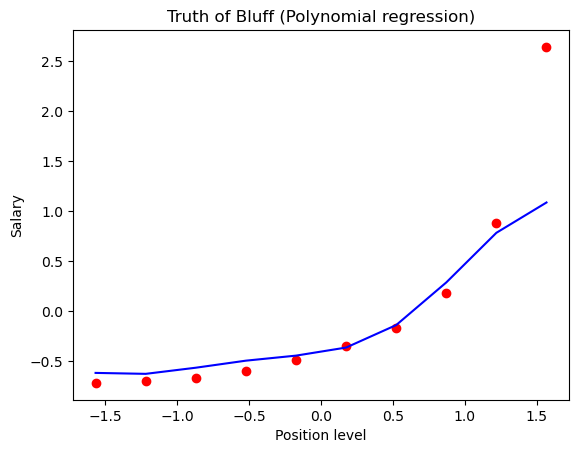

In [9]:
# Visualising the Regression results
plt.scatter(X, y, color='red')
plt.plot(X, regressor.predict(X), color='blue')
plt.title('Truth of Bluff (Polynomial regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')

/var/folders/wt/fs62y8p10lxgyr__1q15y4_m0000gn/T/ipykernel_3213/818151165.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.1)


Text(0, 0.5, 'Salary')

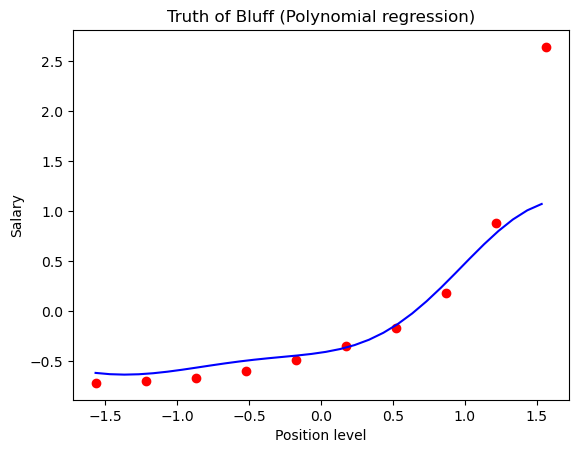

In [10]:
# Visualising the Regression results (for higher resolution and smoother curve)
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color='red')
plt.plot(X_grid, regressor.predict(X_grid), color='blue')
plt.title('Truth of Bluff (Polynomial regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')